## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [19]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image

from pylab import subplot


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [29]:
img_path = "./images/"
img_name = "vibot-color.jpg"
myImage = io.imread(img_path.__add__(img_name))
resize_nearest = misc.imresize(myImage, 30, 'nearest')
resize_bilinear = misc.imresize(myImage, 30, 'bilinear')
resize_bicubic = misc.imresize(myImage, 30, 'bicubic')

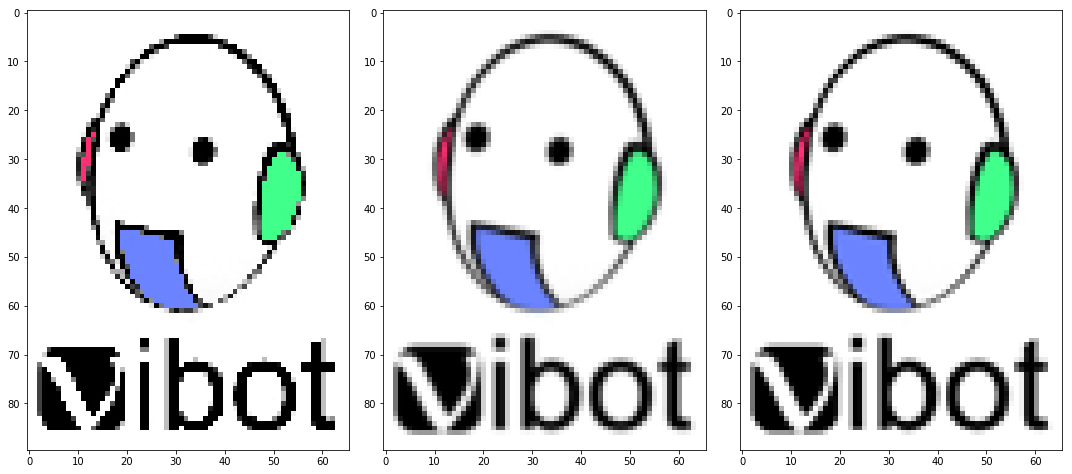

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(resize_nearest)
subplot(1,3,2)
io.imshow(resize_bilinear)
subplot(1,3,3)
io.imshow(resize_bicubic)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [288]:
def simple_blend (image1, image2):
    height, width, depth = image1.shape
    blended = np.zeros_like(image1)
    middle = (np.ceil(width/2).astype('ubyte'))
    blended[:,:middle] = image1[:,:middle]
    blended[:,middle:width] = image2[:,middle:width]
    return blended

def alpha_blend (image1, image2, window):
    #blended = image1 * (1.0 - alpha) + image2 * alpha
    height, width, depth = image1.shape
    middle = np.ceil(width/2).astype('ubyte')
    x = window * 2
    x1 = middle - window
    x2 = middle + window
    alpha = x/(x1-x2) - x2/(x1-x2)
    #alpha = 0.5
    blended = np.zeros_like(image1)
    blended[:,:middle-window] = image1[:,:middle-window]
    blended[:,middle+window:width] = image2[:,middle+window:width]
    blended[:,middle-window:middle+window] = image1[:,middle-window:middle+window] * alpha + (1 - alpha) * image2[:,middle-window:middle+window]
    return blended

def pyramid_blend (image1, image2):
    laplacian_img1 = transform.pyramid_laplacian(image1)
    laplacian_img2 = transform.pyramid_laplacian(image2)
    gaussian_img1 = transform.pyramid_gaussian(image1)
    g1, g2, g3, g4 = transform.pyramid_gaussian(image1, 3)
    
    gaussian_img2 = transform.pyramid_gaussian(image2)
    #blended = (laplacian_img1 * gaussian_img1) + (laplacian_img2 * gaussian_img2)
    blended = image1
    return g1

In [289]:
img_path = "./images/"
img_name = "apple.jpeg"
myApple = io.imread(img_path.__add__(img_name))

img_path = "./images/"
img_name = "orange.jpeg"
myOrange = io.imread(img_path.__add__(img_name))

mySimpleBlend = simple_blend (myApple, myOrange)
myAlphaBlend = alpha_blend (myApple, myOrange, window=20)
myPiramidBlend = pyramid_blend (myApple, myOrange)

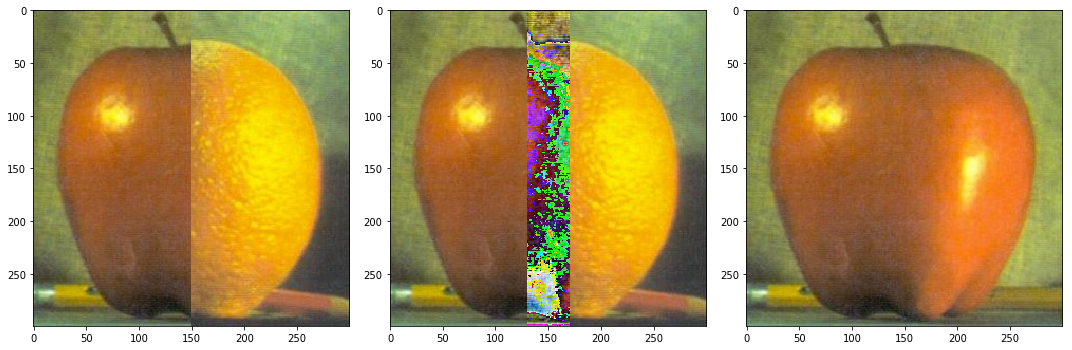

In [290]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(mySimpleBlend)
subplot(1,3,2)
io.imshow(myAlphaBlend)
subplot(1,3,3)
io.imshow(myPiramidBlend)